In [37]:
import geopandas as gpd
import requests
import os
import zipfile
from io import BytesIO
import matplotlib.pyplot as plt


In [ ]:
os.chdir("../data/raw")

In [17]:
data_path="DATOS GEOREFERENCIALES"
os.makedirs(data_path,exist_ok=True)


In [18]:
GEOREF_2000_URL="https://www.inegi.org.mx/contenidos/productos/prod_serv/contenidos/espanol/bvinegi/productos/geografia/marc_geo/702825292843_s.zip"
GEOREF_2010_URL="https://www.inegi.org.mx/contenidos/productos/prod_serv/contenidos/espanol/bvinegi/productos/geografia/marc_geo/702825292805_s.zip "

# 2000

Vamos a ver los contenidos de este archivo zip

In [19]:
# Descarga del archivo zip
url=GEOREF_2000_URL
extract_to=f"{data_path}/2000"


os.makedirs(extract_to, exist_ok=True)

    # Descargamos el archivo zip
response = requests.get(url)
if response.status_code == 200:
        # Abrimos y extraemos el contenido
    with zipfile.ZipFile(BytesIO(response.content)) as z:
        z.extractall(extract_to)
        print(f'El contenido de {url} se extrajo a {extract_to}')
else:
    print(f'Error al descargar {url}, status code: {response.status_code}')

El contenido de https://www.inegi.org.mx/contenidos/productos/prod_serv/contenidos/espanol/bvinegi/productos/geografia/marc_geo/702825292843_s.zip se extrajo a DATOS GEOREFERENCIALES/2000


In [20]:
f=extract_to

for zip in os.listdir(f):
    file_path=f+f"/{zip}"
    with zipfile.ZipFile(file_path) as z:
        z.extractall(f)
        print(f'El contenido de {zip} se extrajo a {f}')


El contenido de mge2000.zip se extrajo a DATOS GEOREFERENCIALES/2000
El contenido de mgm2000.zip se extrajo a DATOS GEOREFERENCIALES/2000
El contenido de mgau2000.zip se extrajo a DATOS GEOREFERENCIALES/2000


# 2010

## Descarga

In [25]:
import subprocess
command = (
    'cd "DATOS GEOREFERENCIALES" && '
    'mkdir 2010 && '
    'cd "2010" && '
    'curl -O https://www.inegi.org.mx/contenidos/productos/prod_serv/contenidos/espanol/bvinegi/productos/geografia/marc_geo/702825292805_s.zip'
)

execute=subprocess.run(command,shell=True,capture_output=True,text=True)
print(execute.stdout)
print(execute.stderr)


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  1 59.0M    1  898k    0     0   359k      0  0:02:47  0:00:02  0:02:45  359k
  3 59.0M    3 2210k    0     0   646k      0  0:01:33  0:00:03  0:01:30  646k
  6 59.0M    6 3652k    0     0   830k      0  0:01:12  0:00:04  0:01:08  830k
  8 59.0M    8 5129k    0     0   942k      0  0:01:04  0:00:05  0:00:59 1239k
 10 59.0M   10 6542k    0     0  1018k      0  0:00:59  0:00:06  0:00:53 1367k
 13 59.0M   13 8068k    0     0  1086k      0  0:00:55  0:00:07  0:00:48 1455k
 16 59.0M   16 9711k    0     0  1155k      0  0:00:52  0:00:08  0:00:44 1505k
 18 59.0M   18 11.1M    0     0  1215k      0  0:0

In [26]:
pwd

'/Users/federicocirett/Documents/GitHub/ingCaracteristicasProyecto_/data/raw'

In [27]:
f="DATOS GEOREFERENCIALES/2010"

for zip in os.listdir(f):
    file_path=f+f"/{zip}"
    with zipfile.ZipFile(file_path) as z:
        z.extractall(f)
        print(f'El contenido de {zip} se extrajo a {f}')


El contenido de 702825292805_s.zip se extrajo a DATOS GEOREFERENCIALES/2010


In [28]:
os.listdir(f)[2:]

['mglr2010v5_0.zip', 'mgm2010v5_0.zip', 'mglu2010v5_0.zip', 'mge2010v5_0.zip']

In [29]:
for zip in os.listdir(f)[2:]:
    file_path=f+f"/{zip}"
    with zipfile.ZipFile(file_path) as z:
        z.extractall(f)
        print(f'El contenido de {zip} se extrajo a {f}')


El contenido de mglr2010v5_0.zip se extrajo a DATOS GEOREFERENCIALES/2010
El contenido de mgm2010v5_0.zip se extrajo a DATOS GEOREFERENCIALES/2010
El contenido de mglu2010v5_0.zip se extrajo a DATOS GEOREFERENCIALES/2010
El contenido de mge2010v5_0.zip se extrajo a DATOS GEOREFERENCIALES/2010


## Exploración

In [32]:
data_path="DATOS GEOREFERENCIALES/2010"
data=['estados.dbf',
      'estados.prj',
      'estados.shp',
      'estados.shx'
        ]

df=gpd.read_file(f"{data_path}/estados.shp")
df




,CVE_ENT,NOM_ENT,geometry
0,09,Distrito Federal,"POLYGON ((2802175.66 843326.718, 2801806.563 8..."
1,12,Guerrero,"MULTIPOLYGON (((2723198.21 539350.53, 2723205...."
2,15,México,"POLYGON ((2717218.9 921748.845, 2717277.833 92..."
3,17,Morelos,"POLYGON ((2808476.273 786837.16, 2808717.306 7..."
4,25,Sinaloa,"MULTIPOLYGON (((2050677.49 1245244.569, 205066..."
5,02,Baja California,"MULTIPOLYGON (((1458026.171 1855728.155, 14578..."
6,26,Sonora,"MULTIPOLYGON (((1621363.08 1783430.468, 162134..."
7,03,Baja California Sur,"MULTIPOLYGON (((1694646.29 1227655.31, 1694634..."
8,32,Zacatecas,"POLYGON ((2515182.307 1441549.748, 2515937.735..."
9,10,Durango,"POLYGON ((2107050.444 1641943.398, 2109767.527..."


<Axes: title={'center': 'Titulo'}>

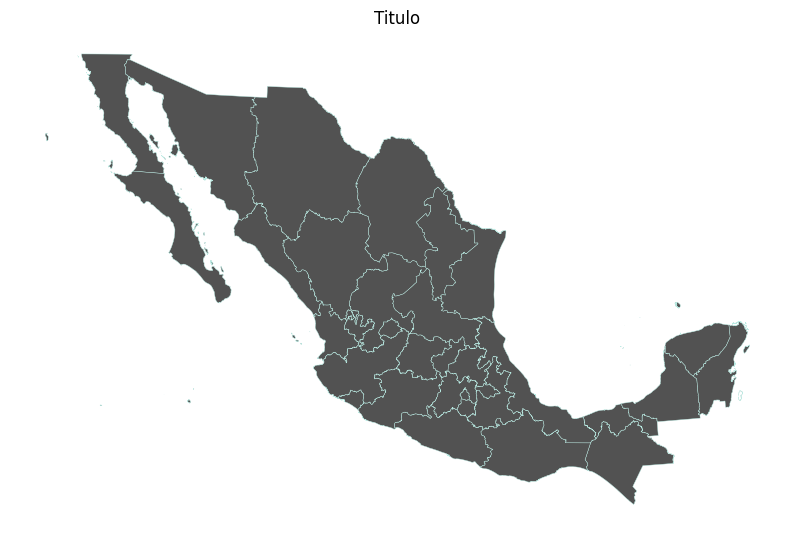

In [38]:
fig , fila = plt.subplots(1, figsize=(10,11))

plt.title('Titulo')
plt.axis('off')
df.plot( 
        facecolor='#525252',
        linewidth=0.3,
        edgecolor='#B9EBE3',
        ax=fila
)